# Предобработка данных

# Содержание работы

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Загрузите данные о пассажирах Титаника и познакомьтесь со структурой датасета.


In [132]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML5.5%20EDA/data/titanic.csv')

In [133]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
training_set.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [135]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,4,644


### 2. Проведите анализ и визуализацию каждого признака датасета. Сделайте вывод о виде распределения и шкале каждого признака.

In [136]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, training_set.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

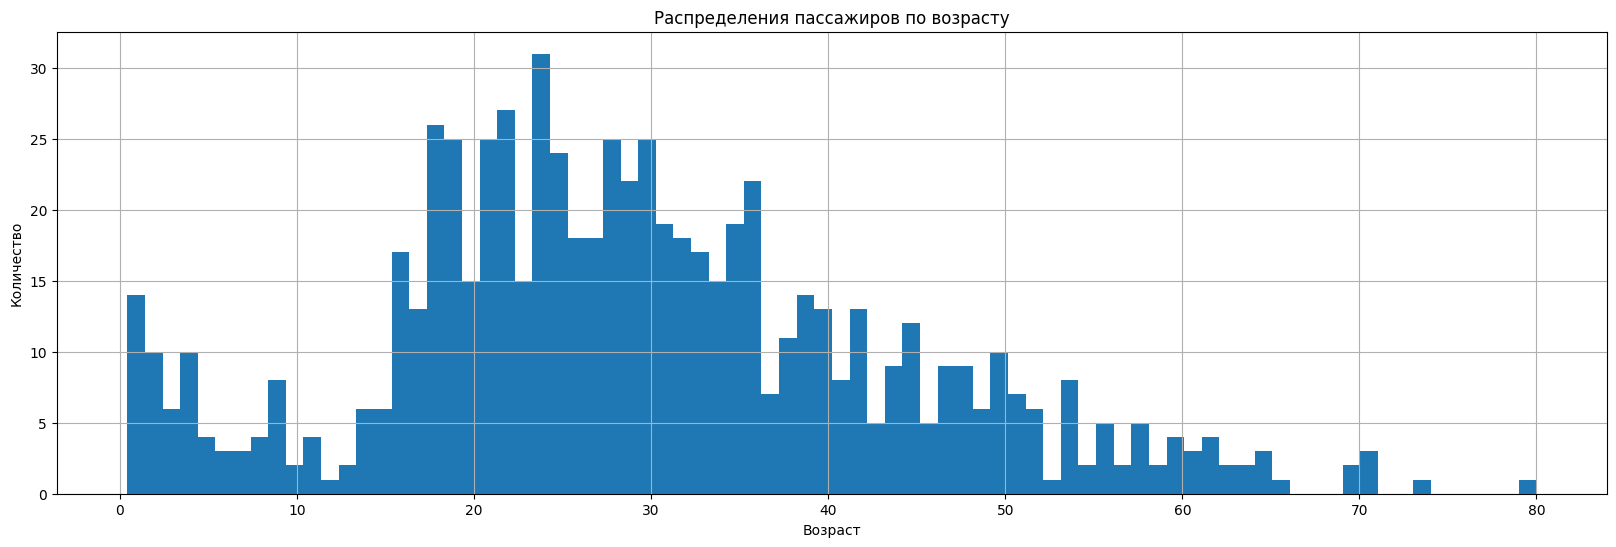

In [137]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

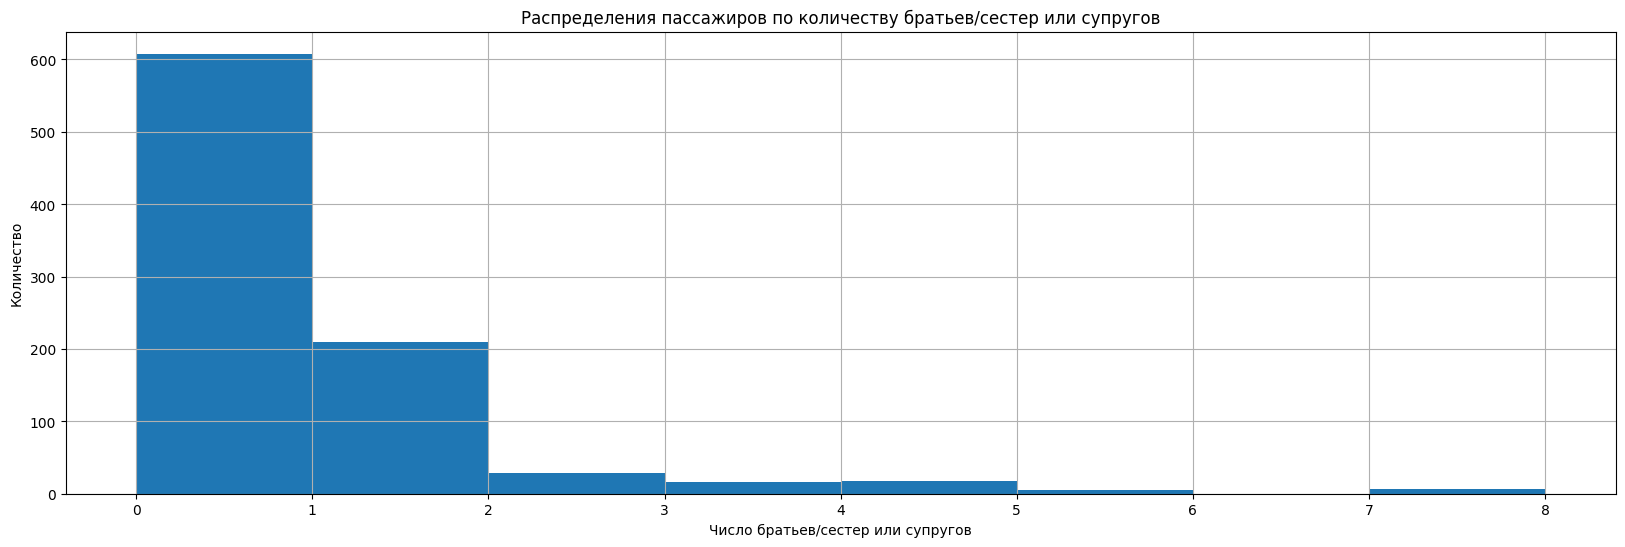

In [138]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов', 
  'Число братьев/сестер или супругов')

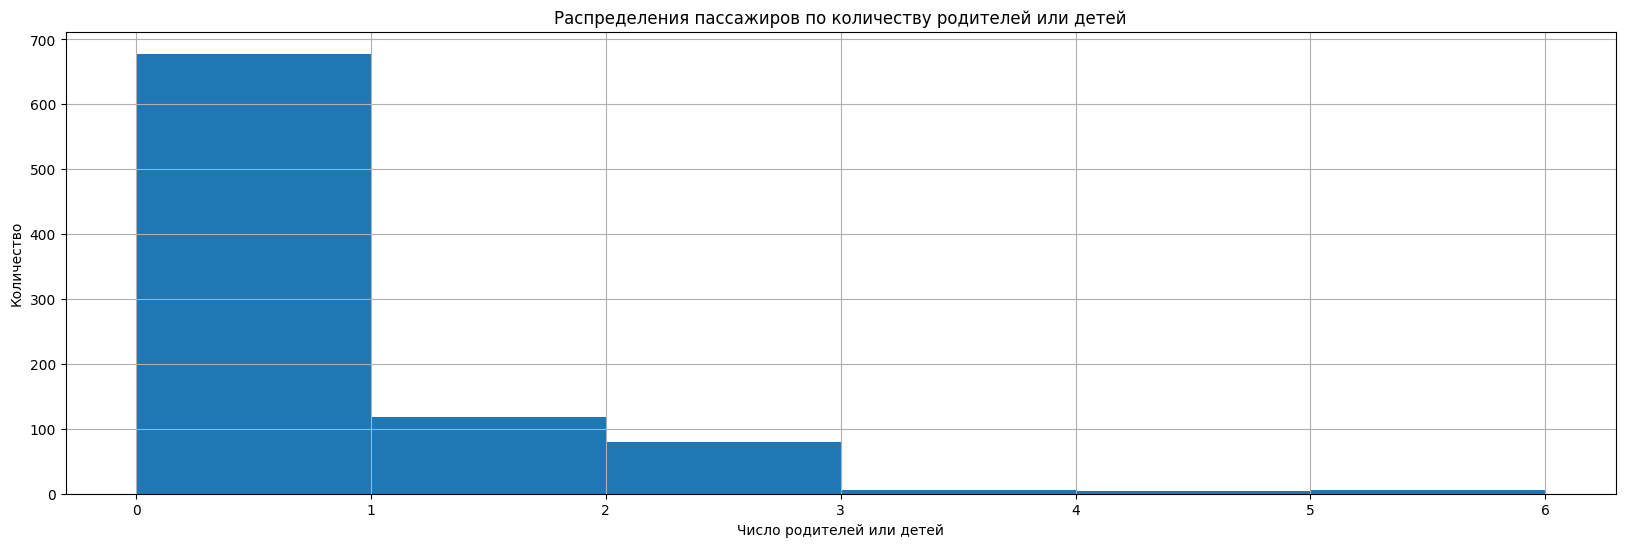

In [139]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей', 
  'Число родителей или детей')

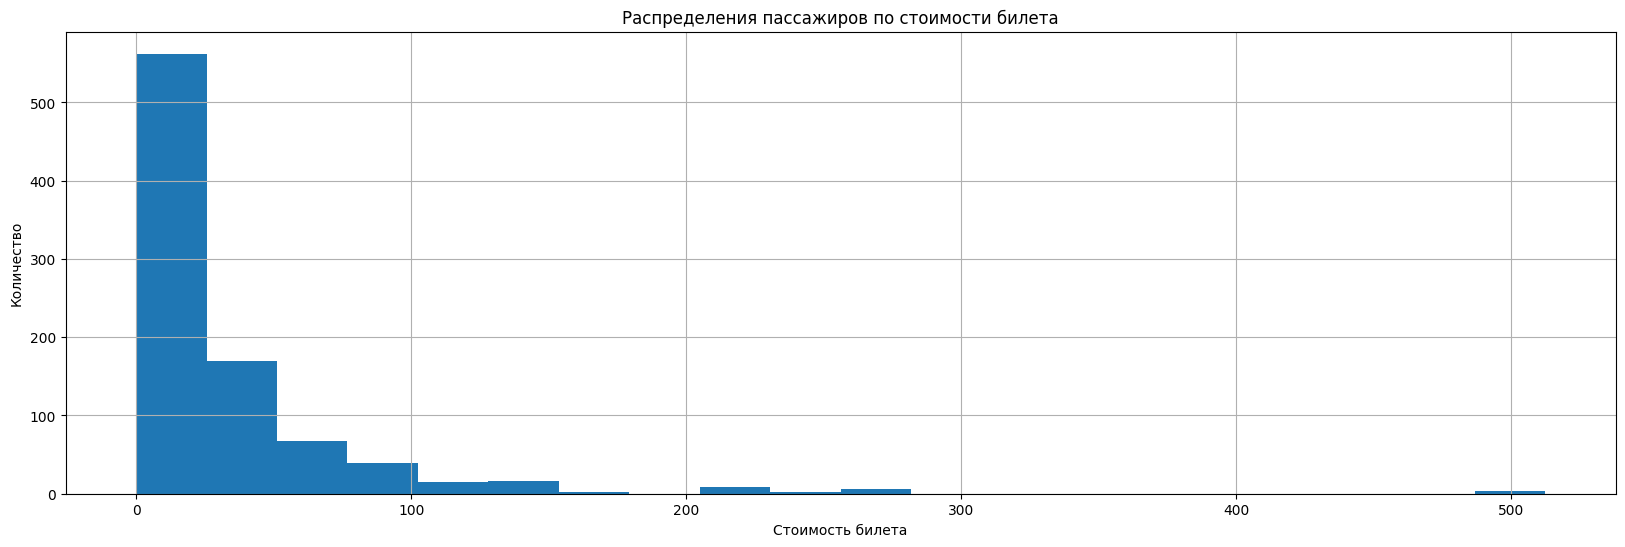

In [140]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета', 
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

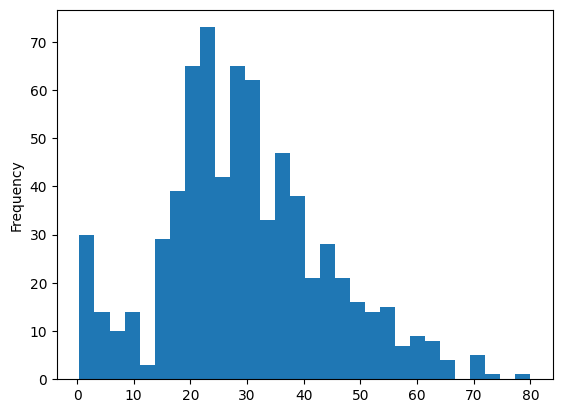

In [141]:
training_set['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

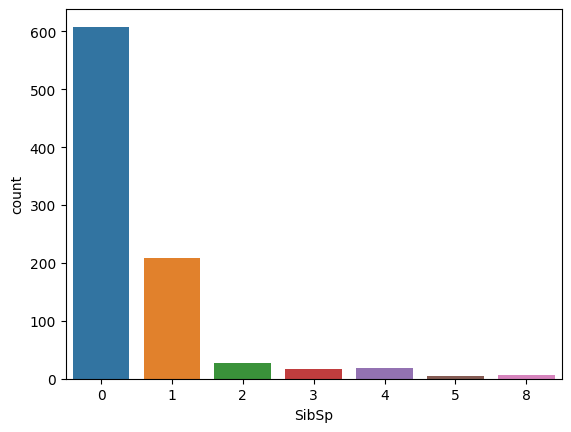

In [142]:
sns.countplot(x='SibSp', data=training_set)

In [143]:
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

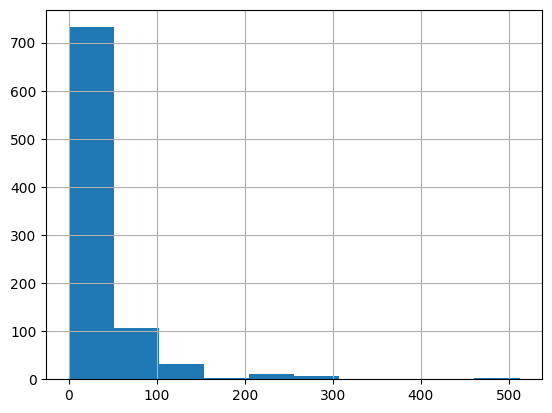

In [144]:
training_set['Fare'].hist()

<Axes: >

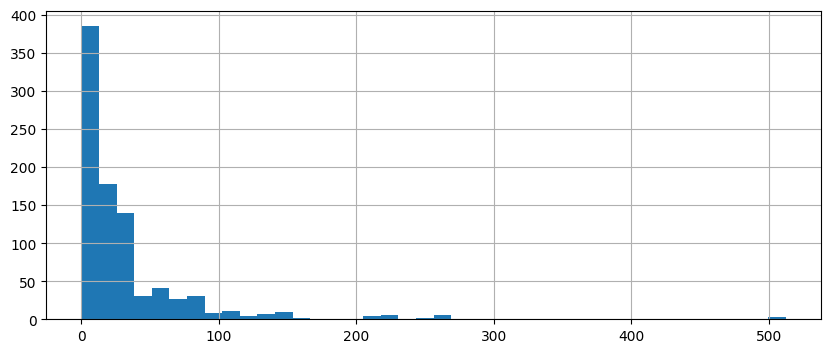

In [145]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

### 3. Проанализируйте влияние каждого признака на целевую переменную. Проиллюстрируйте ее графиками.

<Axes: xlabel='Survived', ylabel='count'>

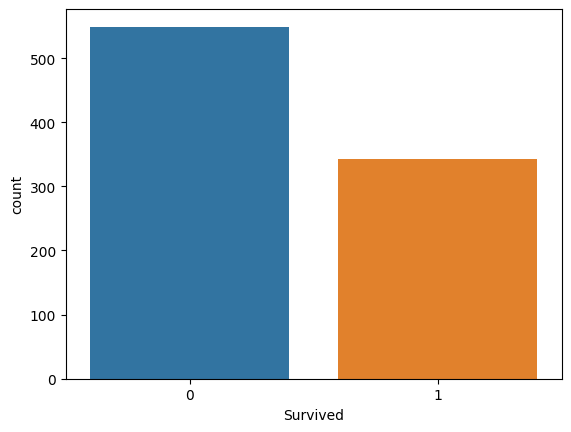

In [146]:
sns.countplot(x='Survived', data=training_set)

<Axes: xlabel='Survived', ylabel='count'>

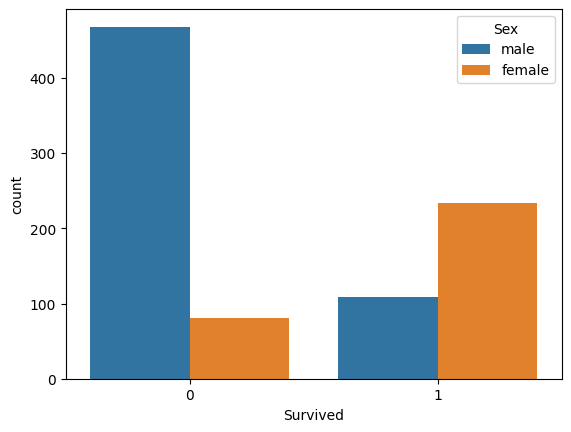

In [147]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

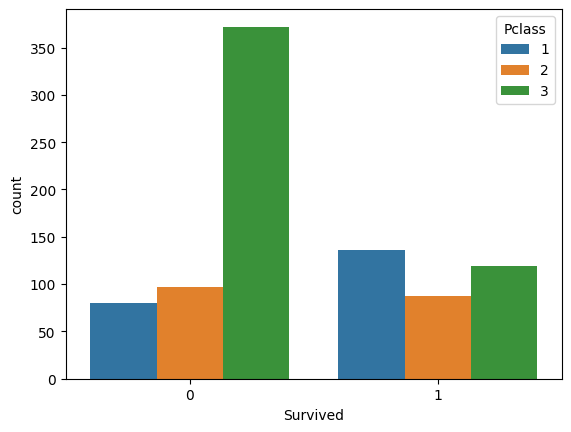

In [148]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

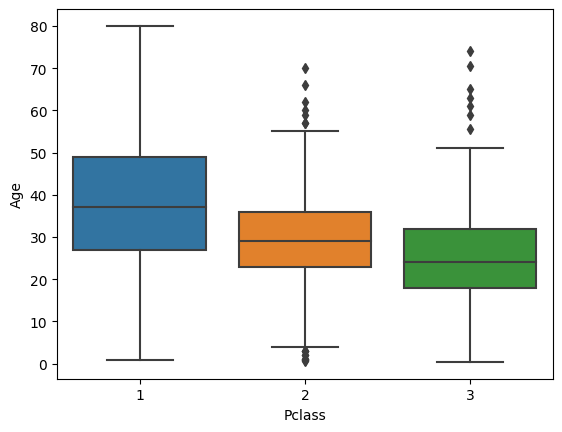

In [149]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

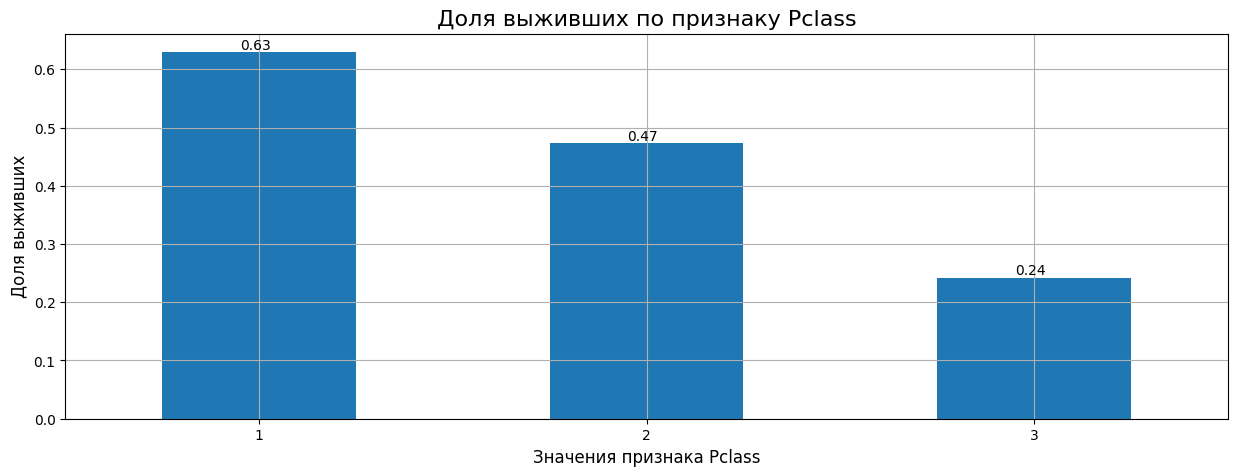

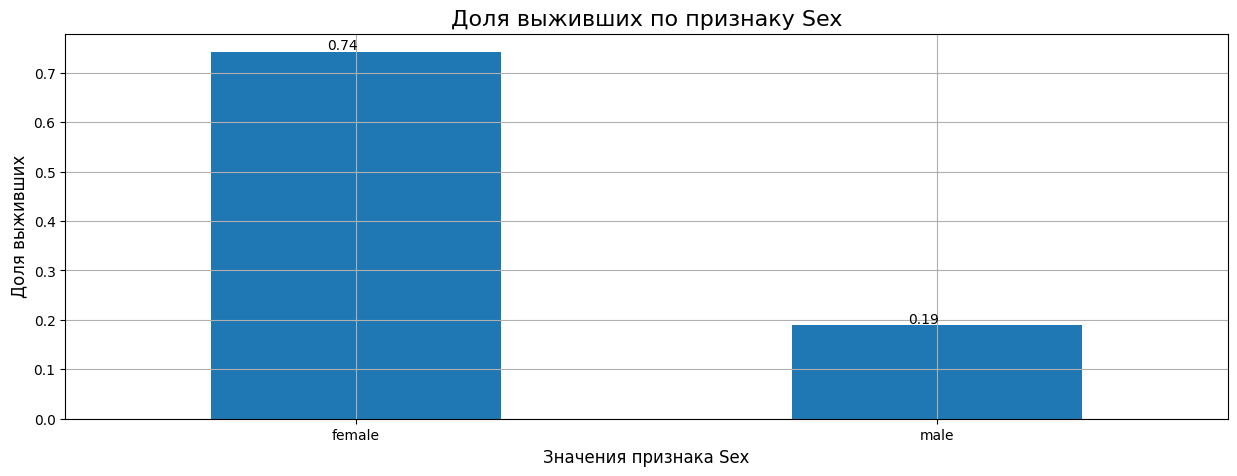

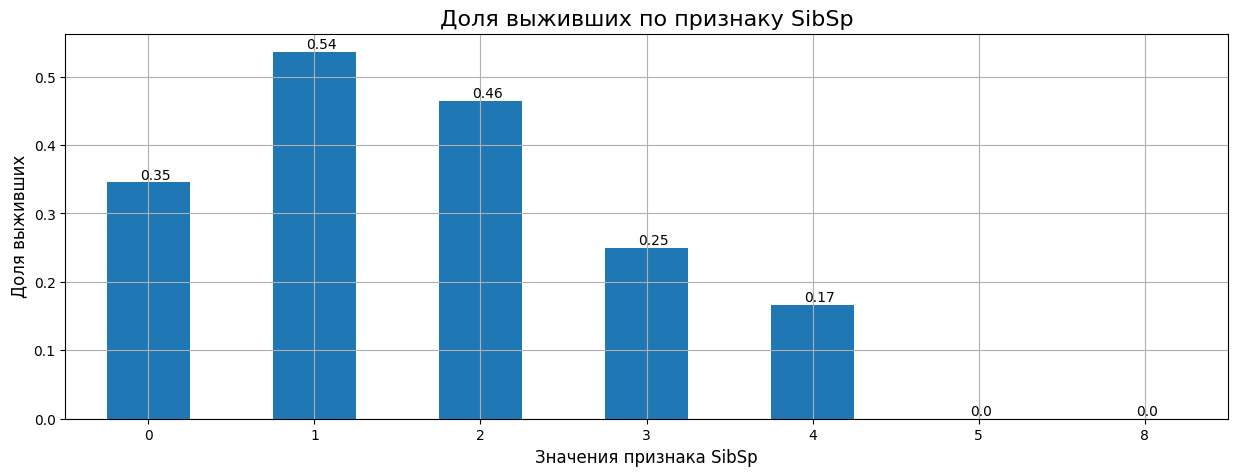

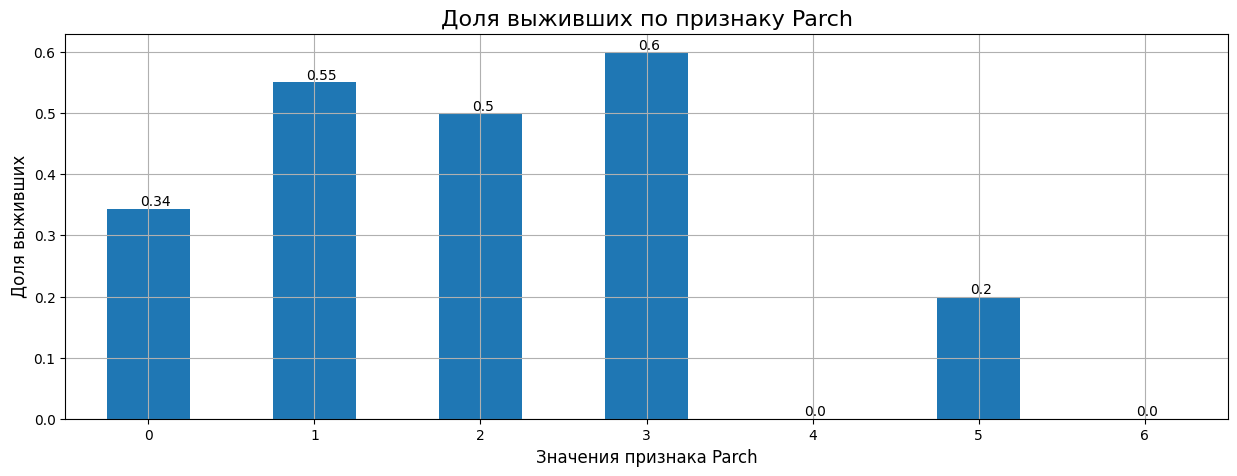

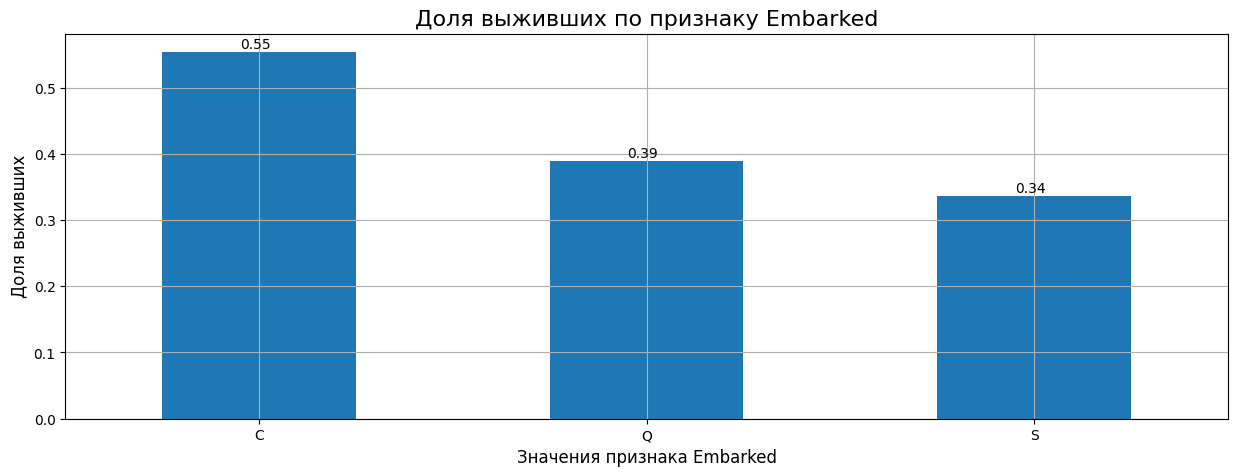

In [150]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})
    
    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))
        
    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax) 
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

### 4. Исследуйте и исправьте при необходимости пропущенные значения в датасете.

In [151]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [154]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

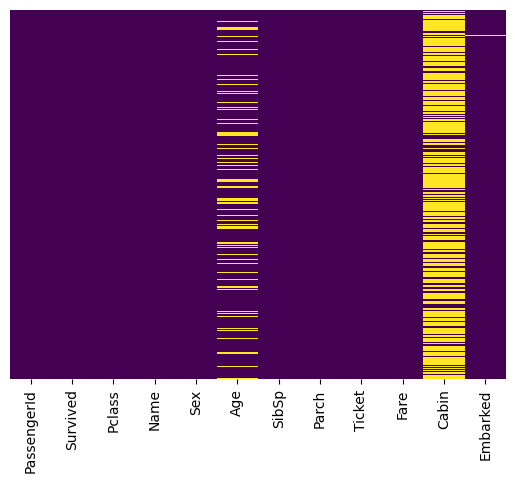

In [155]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [156]:
training_set.drop('Cabin', axis=1, inplace=True)

In [157]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

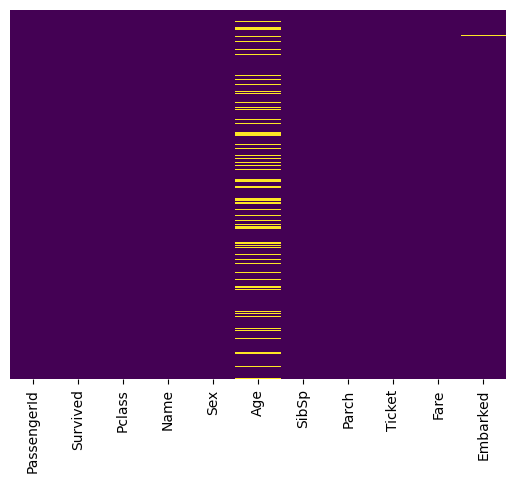

In [158]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [159]:
training_set.dropna(inplace=True)

<Axes: >

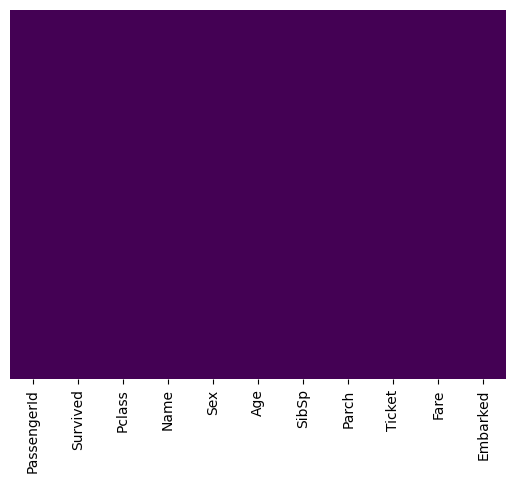

In [160]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### 5. Преобразуйте категориальные признаки в численные самым подходящим способом.

In [161]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [162]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [163]:
np.unique(cat_enc_le)  

array([0, 1])

In [164]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']]) 

In [165]:
training_set.shape, cat_enc_ohe.shape

((712, 11), (712, 3))

In [169]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [170]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [171]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [172]:
training_set = pd.concat([training_set, sex, embark], axis=1)
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [173]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Задания для самостоятельной работы

### 1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = training_set.drop("Survived", axis=1)
y = training_set["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107  15]
 [ 28  64]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



### 2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:


### 3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?


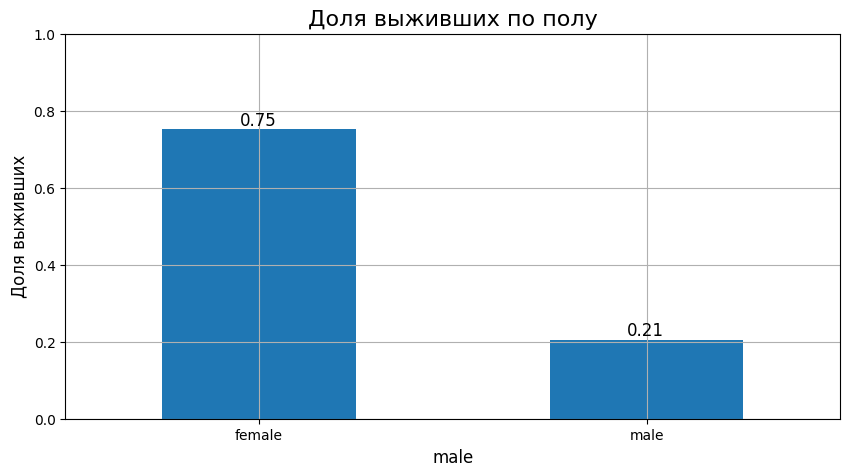

In [190]:
pivot = training_set.pivot_table(index='male', values='Survived', aggfunc='mean')

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Доля выживших по полу', fontdict={'size': 16})
ax.set_ylabel('Доля выживших', fontdict={'size': 12})
ax.set_xlabel('Пол', fontdict={'size': 12})

for cnt in range(pivot.shape[0]):
    value = pivot.iloc[cnt].values[0]
    ax.text(cnt - 0.05, value + 0.01, round(value, 2), fontdict={'size': 12})

pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
plt.xticks([0, 1], ['female', 'male'], rotation=0)
plt.ylim(0, 1)
plt.show()


### 4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

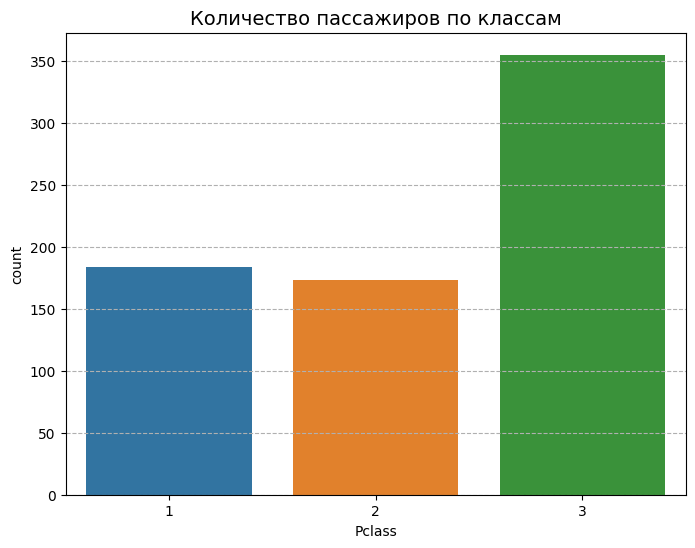

In [231]:
plt.figure(figsize=(8, 6))
sns.countplot(data=training_set, x='Pclass')

plt.title('Количество пассажиров по классам', fontsize=14)
plt.grid(axis='y', linestyle='--')
plt.show()

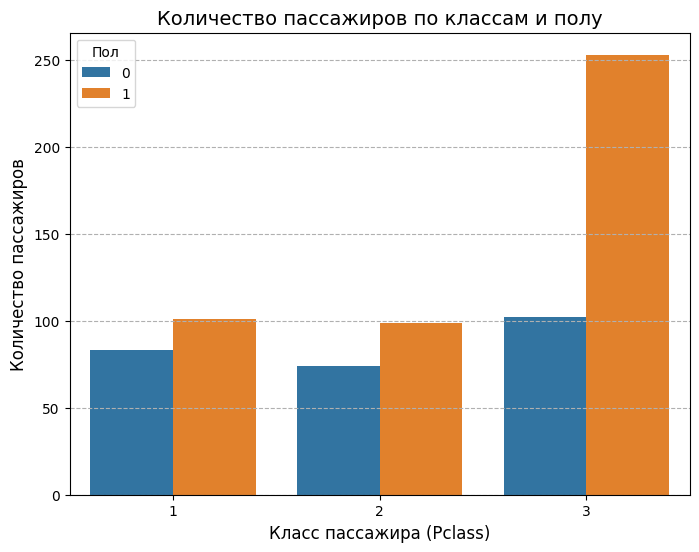

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=training_set, x='Pclass', hue='male')

plt.title('Количество пассажиров по классам и полу', fontsize=14)
plt.xlabel('Класс пассажира (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Пол')
plt.grid(axis='y', linestyle='--')
plt.show()


In [229]:
training_set["Pclass"].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [228]:
grouped = training_set.groupby(['Pclass', 'male']).size().unstack()
print(grouped)

male      0    1
Pclass          
1        83  101
2        74   99
3       102  253


### 5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.


<Axes: >

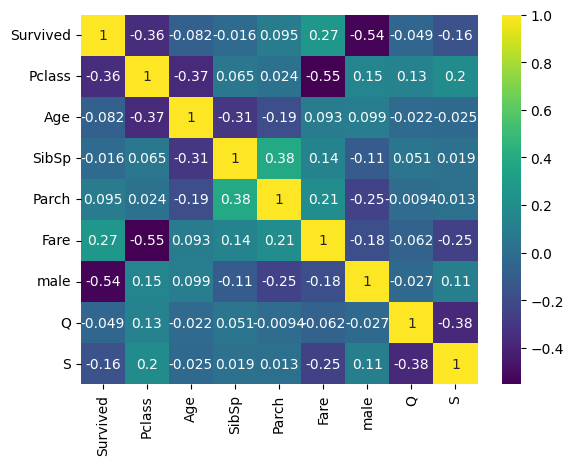

In [234]:
sns.heatmap(data=training_set.corr(), annot=True, cmap="viridis")

На тепловой карте мы видим, что с целевой переменной, далеко не все переменные сильно коррелируют, значение нескольких из них почти равно нулю.

Так же ранее были удалены переменные, не влияющие на целевую переменную, такие как номер билета, имя и номер пассажира.

### 6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).

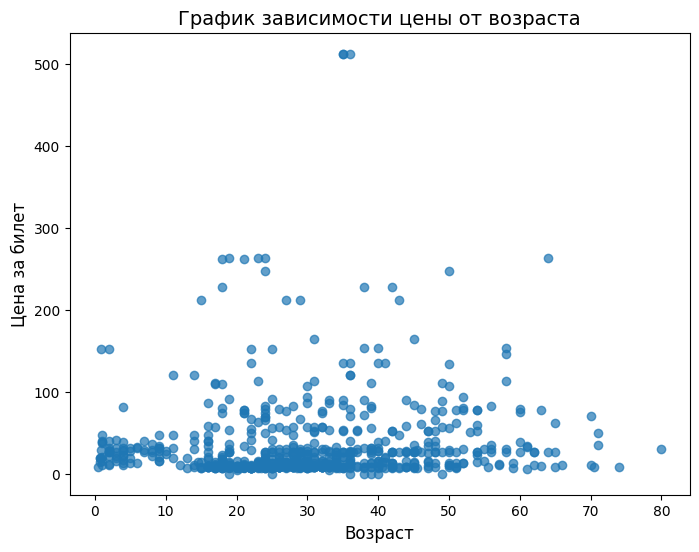

In [258]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(x=training_set["Age"], y=training_set["Fare"], alpha=0.7)
plt.title('График зависимости цены от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Цена за билет', fontsize=12)
plt.show()

In [259]:
print(f"Коэффициент корреляции: {training_set['Age'].corr(training_set['Fare']):.4f}")

Коэффициент корреляции: 0.0931


Корреляции между этими признаками нет

### 7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

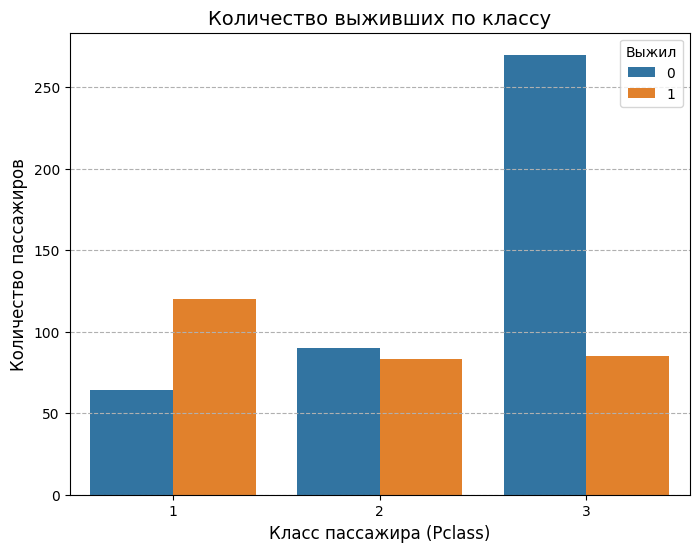

In [261]:
plt.figure(figsize=(8, 6))
sns.countplot(data=training_set, x='Pclass', hue='Survived')

plt.title('Количество выживших по классу', fontsize=14)
plt.xlabel('Класс пассажира (Pclass)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.legend(title='Выжил')
plt.grid(axis='y', linestyle='--')
plt.show()

In [262]:
print(f"Коэффициент корреляции: {training_set['Pclass'].corr(training_set['Survived']):.4f}")

Коэффициент корреляции: -0.3565


Имеется отрицательная корреляция, по графику видно, что пассажиры третьего класса выживали с меньшей вероятностью

### 8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.

In [270]:
def decode_embarked(row):
    if row['S'] == 1:
        return 'S'
    elif row['Q'] == 1:
        return 'Q'
    else:
        return 'C'

training_set['Embarked'] = training_set.apply(decode_embarked, axis=1)


fare_stats = training_set.groupby('Embarked')['Fare'].agg(['min', 'mean', 'max']).round(2)
print("Стоимость билетов по портам отправления:\n", fare_stats)


southampton_fare = training_set[training_set['Embarked'] == 'S']['Fare']
print("\nТолько Саутгемптон:")
print(f"Минимум: {southampton_fare.min():.2f}")
print(f"Среднее: {southampton_fare.mean():.2f}")
print(f"Максимум: {southampton_fare.max():.2f}")

Стоимость билетов по портам отправления:
            min   mean     max
Embarked                     
C         4.01  68.30  512.33
Q         6.75  18.27   90.00
S         0.00  27.48  263.00

Только Саутгемптон:
Минимум: 0.00
Среднее: 27.48
Максимум: 263.00


### 9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

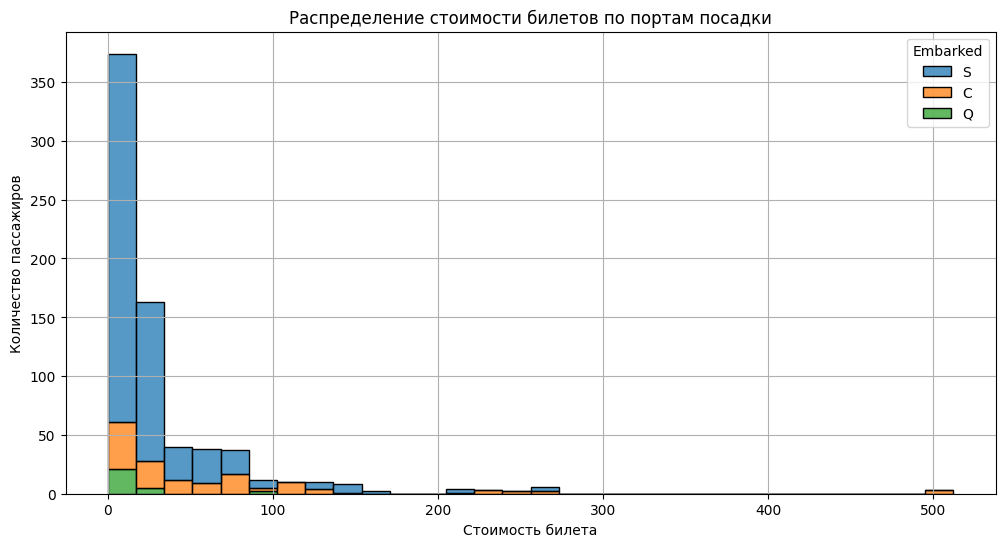

In [269]:
plt.figure(figsize=(12, 6))
sns.histplot(data=training_set, x='Fare', hue='Embarked', multiple='stack', bins=30)
plt.title('Распределение стоимости билетов по портам посадки')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.grid(True)
plt.show()

### 10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?

In [273]:
total_in_sample = training_set.shape[0]

survived_in_sample = training_set['Survived'].sum()

total_passengers_real = 2224
total_survived_real = 710

fraction_of_population = total_in_sample / total_passengers_real


print(f"Размер выборки: {total_in_sample}")
print(f"Выживших в выборке: {survived_in_sample}")
print(f"Доля выборки от всей совокупности: {fraction_of_population:.2%}")

Размер выборки: 712
Выживших в выборке: 288
Доля выборки от всей совокупности: 32.01%


### 11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?

In [279]:
from sklearn.model_selection import train_test_split

X = training_set.drop(columns='Survived')
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

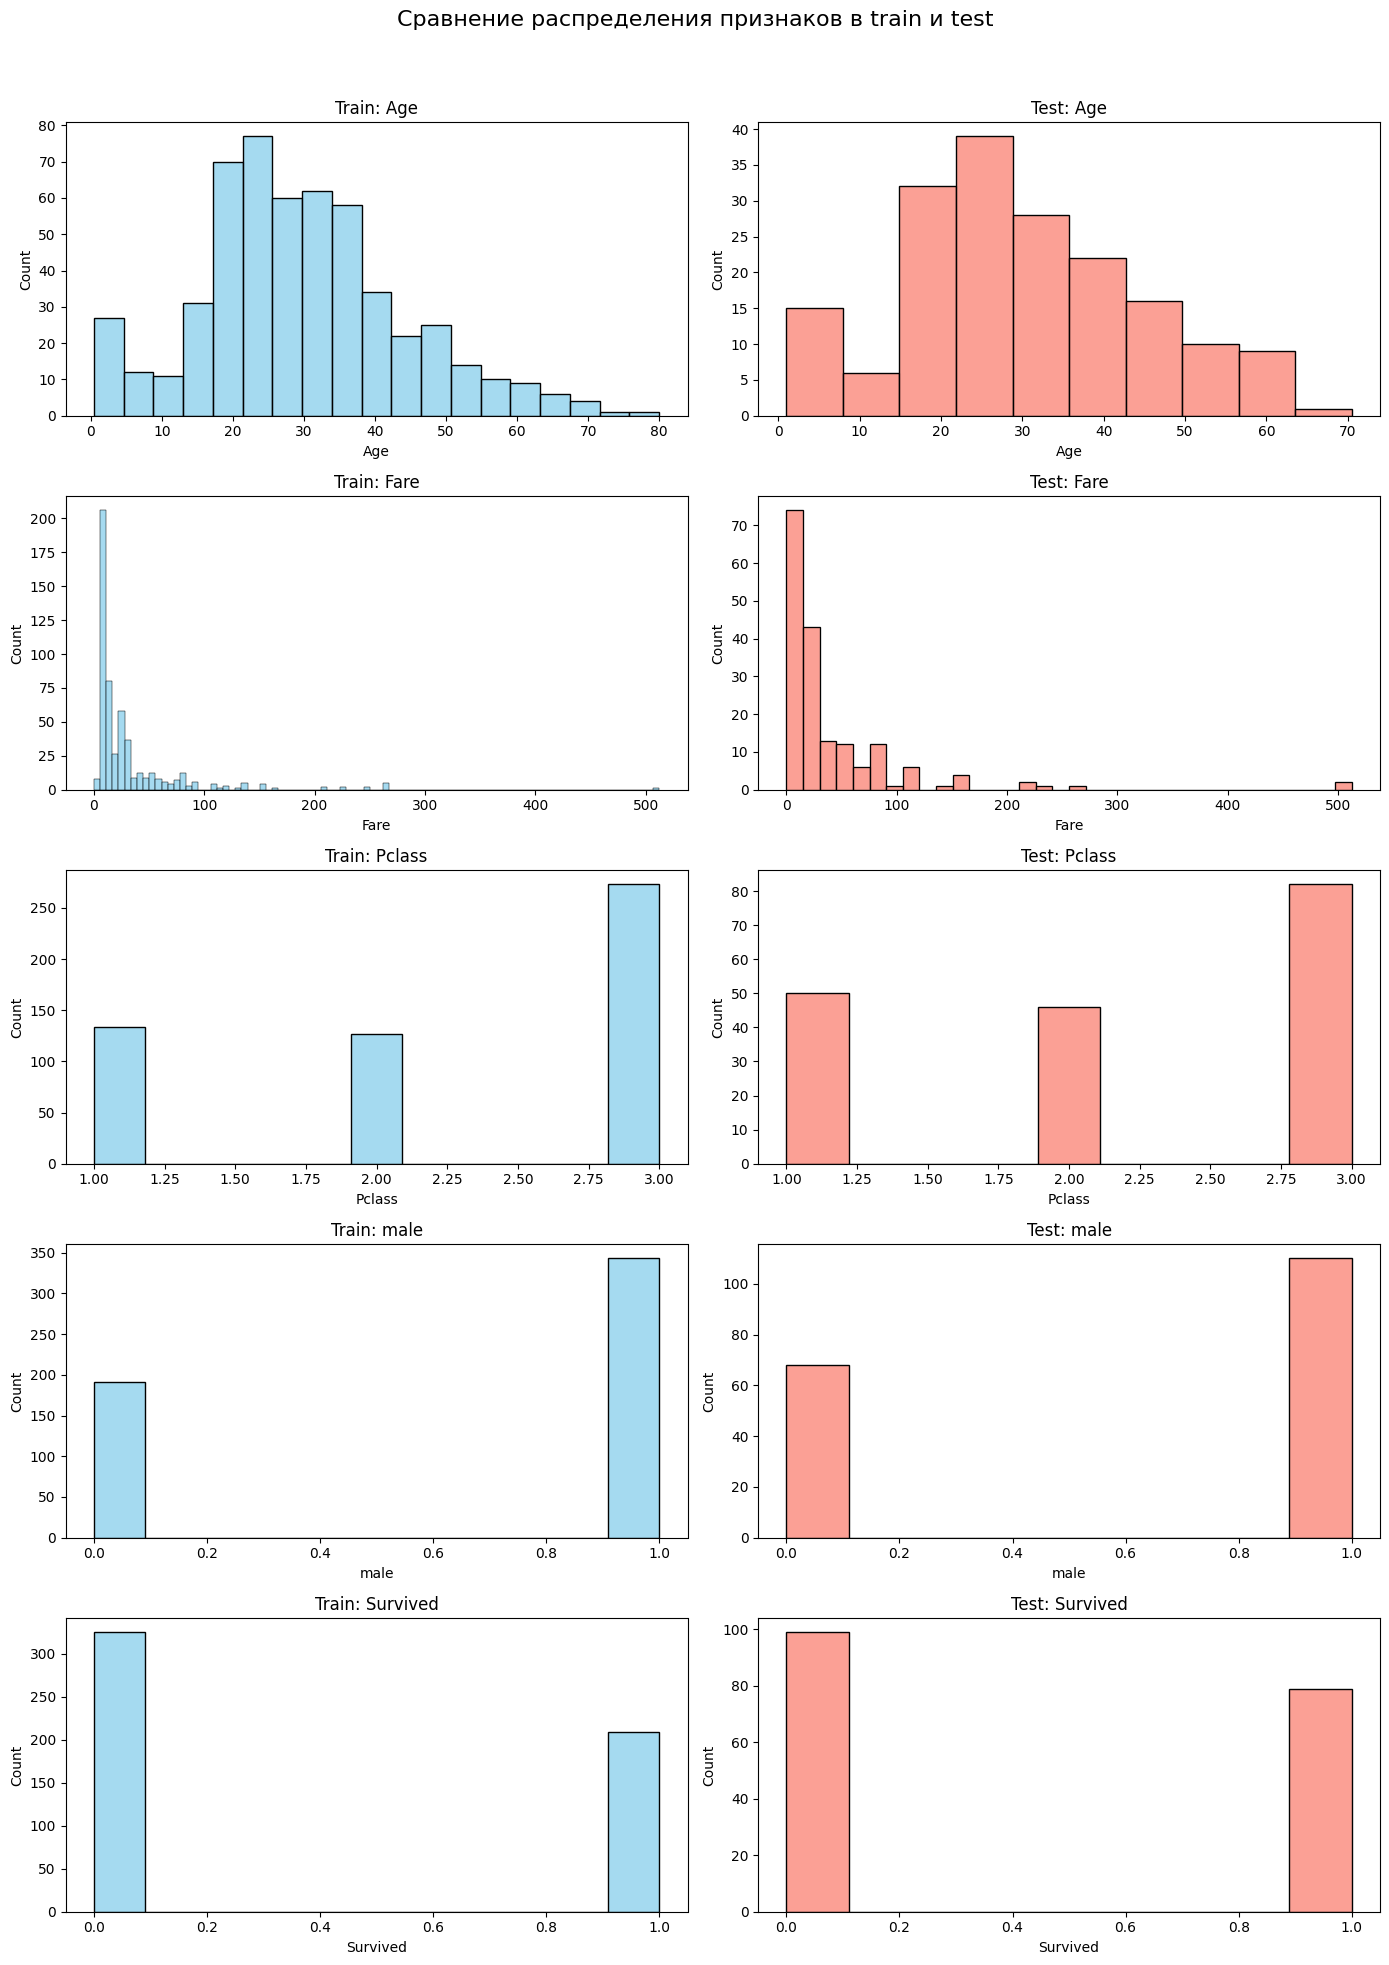

In [280]:
train_df = X_train.copy()
train_df['Survived'] = y_train

test_df = X_test.copy()
test_df['Survived'] = y_test

features = ['Age', 'Fare', 'Pclass', 'male', 'Survived']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
fig.suptitle('Сравнение распределения признаков в train и test', fontsize=16)

for i, feature in enumerate(features):
    sns.histplot(train_df[feature], kde=False, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Train: {feature}')
    
    sns.histplot(test_df[feature], kde=False, ax=axes[i][1], color='salmon')
    axes[i][1].set_title(f'Test: {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Даже несмотря на то что мы никак не балансировали классы, выборка получилась достаточно однородной

### 12. Сбалансируйте классы в исходном датасете двумя способами:

### 13. Удалите лишние объекты мажоритарного класса (выбранные случайно)


In [283]:
from sklearn.utils import resample

full_df = pd.concat([X, y], axis=1)

majority = full_df[full_df['Survived'] == 0]
minority = full_df[full_df['Survived'] == 1]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
balanced_undersample = pd.concat([majority_downsampled, minority])

print(balanced_undersample['Survived'].value_counts())

0    288
1    288
Name: Survived, dtype: int64


### 14. Добавьте в выборку дубликаты миноритарного класса.


In [284]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced_oversample = pd.concat([majority, minority_upsampled])

print(balanced_oversample['Survived'].value_counts())

0    424
1    424
Name: Survived, dtype: int64


### 15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.

In [286]:
training_set = training_set.drop(columns='Embarked')

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


X = training_set.drop(columns='Survived')
y = training_set['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("До балансировки:")
print(classification_report(y_test, y_pred))

До балансировки:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.81      0.71      0.76        79

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [291]:
from sklearn.utils import resample


full_df = pd.concat([X, y], axis=1)
majority = full_df[full_df['Survived'] == 0]
minority = full_df[full_df['Survived'] == 1]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
balanced = pd.concat([majority_downsampled, minority])

X_bal = balanced.drop(columns='Survived')
y_bal = balanced['Survived']

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, stratify=y_bal, test_size=0.25, random_state=42)

model.fit(X_train_bal, y_train_bal)
y_pred_bal = model.predict(X_test_bal)

print("После undersampling:")
print(classification_report(y_test_bal, y_pred_bal))

После undersampling:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        72
           1       0.72      0.74      0.73        72

    accuracy                           0.72       144
   macro avg       0.72      0.72      0.72       144
weighted avg       0.72      0.72      0.72       144



In [292]:
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced_over = pd.concat([majority, minority_upsampled])

X_over = balanced_over.drop(columns='Survived')
y_over = balanced_over['Survived']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, stratify=y_over, test_size=0.25, random_state=42)

model.fit(X_train_over, y_train_over)
y_pred_over = model.predict(X_test_over)

print("После oversampling:")
print(classification_report(y_test_over, y_pred_over))

После oversampling:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       106
           1       0.76      0.69      0.72       106

    accuracy                           0.74       212
   macro avg       0.74      0.74      0.74       212
weighted avg       0.74      0.74      0.74       212



После балансировки модель сдала показывать даже чуть более худшие результаты, в целом это связано с тем что даже изначальное разбиение было однородное, а классы не имели ярко выраженного дизбаланса

### 16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.

<Axes: >

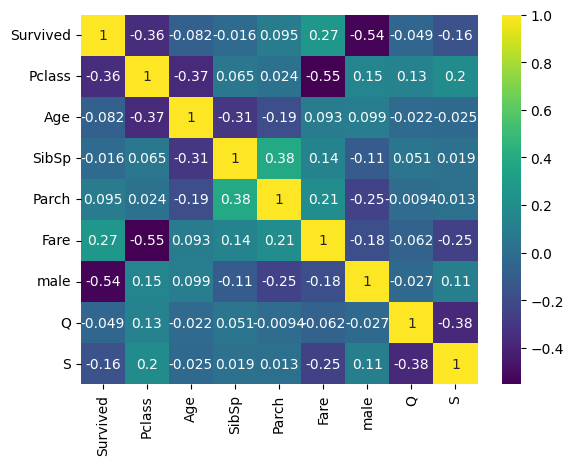

In [295]:
sns.heatmap(data=training_set.corr(), annot=True, cmap="viridis")

По графику видно что есть корреляция между классом и ценой билета, между возрастом и классом, возрастом и количеством сестер\супругов и тп

### 17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.

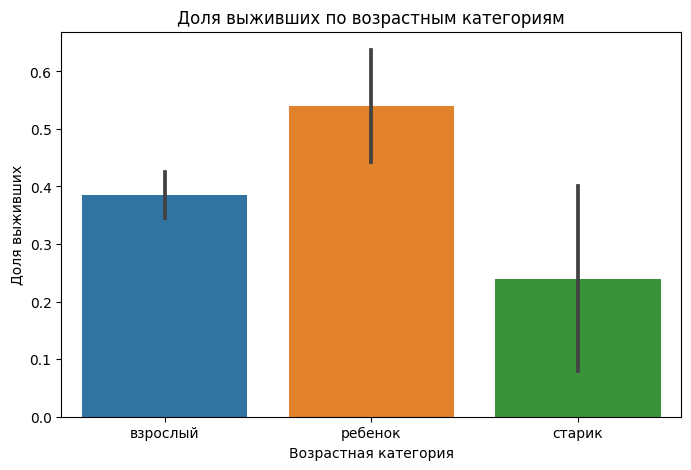

In [296]:
def age_category(age):
    if age < 18:
        return 'ребенок'
    elif age < 60:
        return 'взрослый'
    else:
        return 'старик'

training_set['age_group'] = training_set['Age'].apply(age_category)

plt.figure(figsize=(8,5))
sns.barplot(data=training_set, x='age_group', y='Survived')
plt.title('Доля выживших по возрастным категориям')
plt.ylabel('Доля выживших')
plt.xlabel('Возрастная категория')
plt.show()

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_base = training_set.drop(columns=['Survived', 'Age', 'age_group'])  # базовая модель без группировки
X_grouped = pd.get_dummies(training_set.drop(columns=['Survived', 'Age']), drop_first=True)  # с age_group

y = training_set['Survived']

Xb_train, Xb_test, y_train, y_test = train_test_split(X_base, y, test_size=0.25, random_state=42)
Xg_train, Xg_test, _, _ = train_test_split(X_grouped, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(Xb_train, y_train)
pred_base = model.predict(Xb_test)

model.fit(Xg_train, y_train)
pred_grouped = model.predict(Xg_test)

print(f'F1-score без возрастной категории: {f1_score(y_test, pred_base):.3f}')
print(f'F1-score с возрастной категорией: {f1_score(y_test, pred_grouped):.3f}')

F1-score без возрастной категории: 0.706
F1-score с возрастной категорией: 0.719


# Контрольные вопросы

### Какие основные виды визуализации вы знаете? Какие у них области применения?
Основные виды визуализации включают линейные графики (для временных рядов), гистограммы (для распределений данных), диаграммы рассеяния (для зависимости между переменными), коробочные диаграммы (для анализа распределений с выбросами), и тепловые карты (для визуализации корреляции или плотности). Они используются в зависимости от типа данных и целей анализа, таких как выявление трендов, распределений или взаимосвязей.

### Какие типы визуализации больше всего подходят для анализа совместного распределения двух непрерывных переменных?
Для анализа совместного распределения двух непрерывных переменных подойдут диаграмма рассеяния (scatter plot) и тепловая карта корреляции, а также контурные графики или гистограммы с 2D-плотами.

### Какие типы визуализации больше всего подходят для анализа совместного распределения двух дискретных переменных?
Для двух дискретных переменных лучше всего подходит таблица сопряженности (contingency table) или столбчатая диаграмма с подсчетом значений для каждой категории, также можно использовать тепловую карту.

### Как лучше всего построить совместное распределение дискретной и непрерывной переменной?
Для совместного распределения дискретной и непрерывной переменной используйте ящичковую диаграмму (box plot), которая показывает распределение непрерывной переменной для каждого уровня дискретной переменной, или же диаграмму рассеяния с цветом или размером точек, определяющими дискретную переменную.

### Как лучше всего построить совместное распределение двух непрерывных и одной дискретной переменной?
Для двух непрерывных и одной дискретной переменной используйте цветовую кодировку точек на диаграмме рассеяния или построение парных гистограмм с разделением по категории дискретной переменной.

### Как лучше всего построить совместное распределение двух дискретных и одной непрерывной переменной?
Для двух дискретных и одной непрерывной переменной можно использовать ящичковую диаграмму или столбчатую диаграмму с подсчетом медианы для каждой комбинации категорий двух дискретных переменных.